In [1]:
import pandas as pd
import numpy as np

ratingsAll = pd.read_csv("ratingGrid.csv")
dataArr = ratingsAll.as_matrix()
trainArr = dataArr[:, 0:4027]
testArr = dataArr[:, 4027:]
users_df = pd.read_csv("users_avg.csv")
movies_df = pd.read_csv("movies_avg.csv")


In [34]:
'''for i in range(len(dataArr[0])):
    if (ratingsAll.ix[0][i].item() != 0):
        ratingsAll.ix[0][i] = 0
for i in range(len(dataArr[0])):
    if (ratingsAll.ix[0][i].item() != 0):
        print i
print ratingsAll.ix[0][49]
ratingsAll.head()'''

0


,0,1,2,3,4,5,6,7,8,9,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,4,0,4,5,...,0,4,0,0,4,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,2,2,0,0,0,0


In [38]:
#ratingsAll.to_csv('ratingGrid.csv')
print ratingsAll.ix[0][49]
ratingsAll.head()


0


,0,1,2,3,4,5,6,7,8,9,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,4,0,4,5,...,0,4,0,0,4,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,2,2,0,0,0,0


In [2]:
import math


def findSimilarity(movie1, movie2, grid):
    users = []
    ratings1 = grid[movie1]
    ratings2 = grid[movie2]
    for ind in range(len(ratings1)):
        if(ratings1[ind] != 0 and ratings2[ind] != 0):
            users.append(ind)
    difab = 0
    difas = 0
    difbs = 0
    for ind in range(len(users)):
        userID = users[ind]
        avg = users_df['Average'][userID - 1]
        rating1 = grid[movie1][userID]
        rating2 = grid[movie2][userID]
        difab += (rating1 - avg) * (rating2 - avg)
        difas += np.power(rating1 - avg, 2)
        difbs += np.power(rating2 - avg, 2)
    if (difas == 0 or difbs == 0):
        return 0

    sim = (difab) / (np.sqrt(difas * difbs))
    return sim

def knnb(user, movie, K, grid, grid2):
    #all movies rated by user
    userMovies = []
    userRatings = []


    for ind in range(len(grid)):
        userRatings.append(grid[ind][user])


    for ind in range(len(userRatings)):
        if (userRatings[ind] != 0):
            userMovies.append(ind)

    simList = [0] * len(grid) 
    for ind in range(len(userMovies)):
        sim = findSimilarity(movie, userMovies[ind], grid2)
        simList[userMovies[ind]] = sim
    simListSort = np.argsort(simList)[::-1]
    #if (user == 4530 and movie == 668):
           # print simList
           # print simListSort
    top = 0
    bot = 0
    for ind in range(K):
        thisSim = simList[simListSort[ind]]
        avg = movies_df.ix[movies_df['MovieID'] == simListSort[ind],'Average'].item()
        top += thisSim * (grid[simListSort[ind]][user] - avg)
        #print thisSim * (grid[simListSort[ind]][user] - avg)
        bot += np.abs(thisSim)
    rating = top / bot
    rating = rating + movies_df.ix[movies_df['MovieID'] == movie,'Average'].item()
    return rating


In [5]:
import copy
import time
from sklearn.metrics import mean_squared_error


def test(K):
    global time
    pred = []
    actual = []
    myCount = 0
    myCount2 = 0
    start = time.clock()
    for userID in range(4530,6041):
        for movieID in range(3953):
            if (dataArr[movieID][userID] != 0):
                if (myCount2 == 0):
                    tempArr = copy.copy(dataArr)
                    tempArr[movieID][userID] = 0
                    myCount += 1
                    myCount2 = myCount2 + 1
                    actual.append(dataArr[movieID][userID])
                    #print movieID
                    x = knnb(userID, movieID, K, tempArr, trainArr)
                    pred.append(x)
                    break
                else:
                    myCount2 = myCount2 + 1
                    if (myCount2 >= 100):
                        myCount2 = 0
                
        if (myCount == 400):
            end = time.clock()
            time1 = end - start
            return pred, actual, time1
            #return myCount, pred, actual

error = []
timeList = []
for num in range(6, 13, 2):
    myPred, myActual, myTime = test(num)
    #print myPred
    error.append(mean_squared_error(myActual, myPred))
    timeList.append(myTime)

print error
print timeList

[0.82310087093382323, 0.81726002320447111, 0.79189926684692746, 0.80197541572569042]
[837.9354406660368, 854.7806074496111, 844.0507394861979, 970.7672533950608]


#6 - 12
[0.82310087093382323, 0.81726002320447111, 0.79189926684692746, 0.80197541572569042]
[837.9354406660368, 854.7806074496111, 844.0507394861979, 970.7672533950608]


#14 - 25
0.78934731530525537, 0.7850053017889006, 0.77918116414726712, 0.78347311555968846, 0.77816005095666729, 0.77168874127597098]
[827.1701617605089, 883.0687905521347, 817.5890255171785, 788.4854350804658, 886.879264425675, 919.4027465220443


[0.78953864183586764, 0.7850053017889006, 0.77918116414726712, 0.78367936555968842, 0.77816005095666729, 0.77149342877597094, 0.76886793628372763, 0.76969037253534334, 0.76882931336760463, 0.76890832822609179, 0.76882344816533932, 0.7733763118914786]
[694.879336364811, 632.1447095155163, 723.4654663924921, 661.8105612705513, 660.4105101888963, 663.58045380564, 752.758069539741, 680.0867345992156, 677.1899680996285, 652.7016100985347, 679.1225107068167, 837.245248399362]

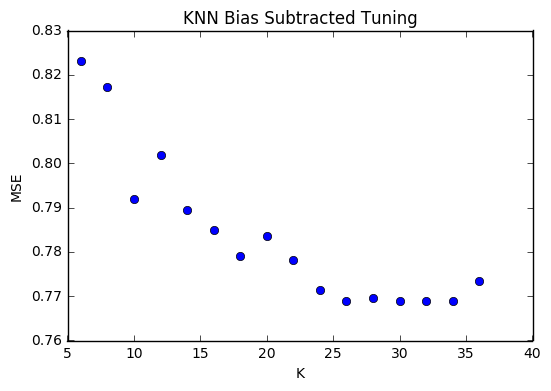

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
errs = [0.82310087093382323, 0.81726002320447111, 0.79189926684692746, 0.80197541572569042, 
        0.78953864183586764, 0.7850053017889006, 0.77918116414726712, 0.78367936555968842, 
        0.77816005095666729, 0.77149342877597094, 0.76886793628372763, 0.76969037253534334, 
        0.76882931336760463, 0.76890832822609179, 0.76882344816533932, 0.7733763118914786 ]
        
plt.plot(range(6, 37, 2), errs, 'o')
plt.ylabel('MSE')
plt.xlabel('K')
plt.title('KNN Bias Subtracted Tuning')
plt.show()